In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


df = pd.read_excel("train_data_exam_1.xlsx", 0)
df.head()

,original_data,score
0,Вот тут у Галы:http://vaskodagala.livejournal....,0
1,"Мужик, разомлевший то ли от коньяка, то ли от ...",0
2,ро треть бедных - тоже вранье. Даже если говор...,-1
3,все относительно. законодатели достали конкре...,-1
4,А Алтайский край и Республика Алтай - разные с...,0


In [2]:
print('Dataset size', df.shape)
print('names of features: ', list(df))

Dataset size (18779, 2)
names of features:  ['original_data', 'score']


In [3]:
print(df.isnull().sum())

original_data    50
score             0
dtype: int64


In [4]:
df[df['original_data'].isnull()].index.tolist()

[62,
 589,
 835,
 1432,
 1643,
 2316,
 2389,
 2461,
 2547,
 2886,
 3316,
 3941,
 4854,
 5048,
 5993,
 6767,
 6960,
 7090,
 7171,
 8176,
 8588,
 8694,
 8815,
 8821,
 8883,
 8919,
 9525,
 9709,
 9784,
 9804,
 10026,
 10169,
 10507,
 10833,
 10962,
 11439,
 11983,
 12289,
 12332,
 12582,
 13643,
 13905,
 14250,
 15386,
 15450,
 15812,
 16330,
 16347,
 17304,
 18077]

In [5]:
df['original_data'][62]

nan

In [6]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.shape

(18729, 2)

In [7]:
vc = df['score'].value_counts()
vc

 0    9747
-1    6467
 1    1205
-2    1060
 2     250
Name: score, dtype: int64

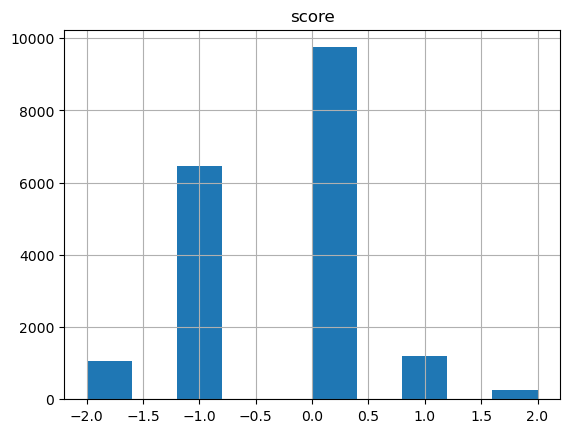

In [8]:
df.hist('score')
plt.show()

# Очистка

In [9]:
from tqdm import tqdm
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

D:\Users\Nurlan\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words("russian")

In [11]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [12]:
def clean(df):
    for i in tqdm(range(df.shape[0])):
        s = str(df['original_data'][i])
        s = s.lower()
        s1 = re.sub(r"[,-.:;?“/!@#$1234567890#—ツ►๑۩۞۩•*”˜˜”*°°*`)(abcdefghijklmnopqrstuvwxyz]", ' ', s)
        tokens = word_tokenize(s1)
        tokens = [w for w in tokens if not w in stop_words]
        for j in range(0,len(tokens)):
            tokens[j] = morph.parse(tokens[j])[0].normal_form
        s_cleared = ' '.join(tokens)
        df.loc[i, 'original_data'] = s_cleared

In [13]:
clean(df)

100%|████████████████████████████████████████| 18729/18729 [06:27<00:00, 48.28it/s]


In [14]:
df['original_data'][7]

'существовать аналогичный политтехнология другой страна мир бабка вложить отбить эфир мелькание изрядно потаскать морда забывать экран оплатить какой траур'

In [15]:
df.to_excel("df_cl.xlsx")

# Токенизация

In [16]:
df_cl = pd.read_excel("df_cl.xlsx", 0)
df_cl.head()

,Unnamed: 0,original_data,score
0,0,гала небольшой коментарий рекомендовать прочит...,0
1,1,мужик разомлеть коньяк мой щастие согласиться ...,0
2,2,ро треть бедный враньё говорить столица провин...,-1
3,3,относительно законодатель достать конкретно зг...,-1
4,4,алтайский край республика алтай разный субъект...,0


In [17]:
df_cl['original_data'][0]

'гала небольшой коментарий рекомендовать прочитать ваш рекомендация зайти форум дежурить почитать вспомнить изречение конфуций очень трудно искать чёрный кошка тёмный комната особенность нех парень который вы спорить пурга голова переубеждать совершенно толк скорее нужно высылать целый набор ссылка сначала перечитать писать пресса выстроить линейка публикация возникать логический связь сколько фильтровать информация явно уметь совершенно чётко пролёживаться компост который нашпиговать средство массовый информация россия'

In [18]:
tokenized_texts = []

for i in tqdm(range(df_cl.shape[0])):
    s = str(df_cl['original_data'][i])
    word_list = nltk.word_tokenize(s)
    tokenized_texts.append(word_list)

100%|██████████████████████████████████████| 18729/18729 [00:08<00:00, 2081.92it/s]


In [19]:
tokenized_texts[0]

['гала',
 'небольшой',
 'коментарий',
 'рекомендовать',
 'прочитать',
 'ваш',
 'рекомендация',
 'зайти',
 'форум',
 'дежурить',
 'почитать',
 'вспомнить',
 'изречение',
 'конфуций',
 'очень',
 'трудно',
 'искать',
 'чёрный',
 'кошка',
 'тёмный',
 'комната',
 'особенность',
 'нех',
 'парень',
 'который',
 'вы',
 'спорить',
 'пурга',
 'голова',
 'переубеждать',
 'совершенно',
 'толк',
 'скорее',
 'нужно',
 'высылать',
 'целый',
 'набор',
 'ссылка',
 'сначала',
 'перечитать',
 'писать',
 'пресса',
 'выстроить',
 'линейка',
 'публикация',
 'возникать',
 'логический',
 'связь',
 'сколько',
 'фильтровать',
 'информация',
 'явно',
 'уметь',
 'совершенно',
 'чётко',
 'пролёживаться',
 'компост',
 'который',
 'нашпиговать',
 'средство',
 'массовый',
 'информация',
 'россия']

# Doc2Vec

In [20]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [21]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokenized_texts)]

In [22]:
mean_len = 0
for i in tqdm(range(df_cl.shape[0])):
    s = str(df_cl['original_data'][i])
    mean_len += len(s.split())
mean_len/df_cl.shape[0]

100%|█████████████████████████████████████| 18729/18729 [00:00<00:00, 50321.75it/s]


92.63569864915372

In [23]:
model = Doc2Vec(documents, vector_size=50, min_count=3, workers=4)
model.build_vocab(documents)

In [24]:
model.train(documents, total_examples=model.corpus_count, epochs=100)

In [25]:
train_emb = np.zeros((len(model.dv), model.vector_size))
for i in range(len(model.dv)):
    train_emb[i] = model.dv[i]

In [26]:
train_emb.shape

(18729, 50)

In [27]:
np.save('train_emb.npy', train_emb)

# Balance

In [28]:
vc

 0    9747
-1    6467
 1    1205
-2    1060
 2     250
Name: score, dtype: int64

In [29]:
vc_mean = int(np.mean(vc))
vc_mean

3745

In [30]:
scores = np.array(df_cl['score'].values).reshape(-1,1)
train_emb_with_scores = np.append(train_emb,scores, axis=1)

In [31]:
train_emb_with_score_2 = train_emb_with_scores[train_emb_with_scores[:,-1] == -2]
train_emb_with_score_1 = train_emb_with_scores[train_emb_with_scores[:,-1] == -1]
train_emb_with_score0 = train_emb_with_scores[train_emb_with_scores[:,-1] == 0]
train_emb_with_score1 = train_emb_with_scores[train_emb_with_scores[:,-1] == 1]
train_emb_with_score2 = train_emb_with_scores[train_emb_with_scores[:,-1] == 2]

In [32]:
from sklearn.utils import resample
def upsmpl(df, n):
    return  resample(df,
             replace=True,
             n_samples=n,
             random_state=np.random.randint(low=0, high=101))

In [33]:
#up_bound = vc_mean
up_bound = 9747

In [34]:
train_emb_with_score_2_up = upsmpl(train_emb_with_score_2, up_bound)
train_emb_with_score_1_up = upsmpl(train_emb_with_score_1, up_bound)
train_emb_with_score0_up = upsmpl(train_emb_with_score0, up_bound)
train_emb_with_score1_up = upsmpl(train_emb_with_score1, up_bound)
train_emb_with_score2_up = upsmpl(train_emb_with_score2, up_bound)
print(train_emb_with_score_2_up.shape,train_emb_with_score_1_up.shape, 
      train_emb_with_score0_up.shape, train_emb_with_score1_up.shape,train_emb_with_score2_up.shape)

(9747, 51) (9747, 51) (9747, 51) (9747, 51) (9747, 51)


In [35]:
train_emb_with_score_bal = np.concatenate([train_emb_with_score_2_up, train_emb_with_score_1_up,
                                           train_emb_with_score0_up, 
                                           train_emb_with_score1_up, train_emb_with_score2_up])
train_emb_with_score_bal.shape

(48735, 51)

In [36]:
np.save('train_emb_with_score_bal.npy', train_emb_with_score_bal)

# TEST TO EMB

In [37]:
test = pd.read_excel("test_data_exam_1.xlsx", 0)
test.head()

,original_data,score
0,"Согласна с постом на все 100. спасибо, распеч...",0
1,"Кроме того, прививки тоже обладают непредсказу...",0
2,com/791341.html машина уродская. не люблю эт...,1
3,просто человек прислал банку свой вариант дого...,-1
4,еально узкоглазые спецы почти единодушно утвер...,-1


In [38]:
test = test.dropna()
test.reset_index(drop=True, inplace=True)

In [39]:
clean(test)

100%|██████████████████████████████████████████| 8027/8027 [02:45<00:00, 48.59it/s]


In [40]:
test.to_excel("clean_test.xlsx")

In [41]:
clean_test = pd.read_excel("clean_test.xlsx", 0)

In [42]:
tokenized_test = []

for i in tqdm(range(clean_test.shape[0])):
    s = str(clean_test['original_data'][i])
    word_list = nltk.word_tokenize(s)
    tokenized_test.append(word_list)

100%|████████████████████████████████████████| 8027/8027 [00:03<00:00, 2093.04it/s]


In [43]:
test_emb = [model.infer_vector(tokenized_test[i]) for i in range(len(tokenized_test))]

In [44]:
np.save('test_emb.npy', test_emb)

In [45]:
test_emb  = np.load('test_emb.npy')

In [46]:
y_test = clean_test['score'].values

In [47]:
def cm(y_test, predicted):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    cmap=plt.cm.Greens
    ax.imshow(metrics.confusion_matrix(y_test, predicted), cmap=cmap)
    fig.set_figwidth(6)    #  width 
    fig.set_figheight(6)    #  height 
    plt.show()

# KNN

In [48]:
train_emb_with_score_bal = np.load('train_emb_with_score_bal.npy')

In [49]:
y = train_emb_with_score_bal[:,-1]
X = train_emb_with_score_bal[:,:-1]

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [60]:
param_grid_knn = [ {'n_neighbors': [1, 3, 7, 9], 'weights': ['uniform','distance'], 'p': [1,2]} ]

mycv = ShuffleSplit(n_splits=2, test_size=0.3, random_state=9)
knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=mycv , scoring='f1_macro')

In [52]:
# knn.fit(X_train, y_train)
knn.fit(X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=9, test_size=0.3, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 7, 9], 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             scoring='f1_macro')

In [53]:
print(knn.best_params_)

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [54]:
import pickle

with open("knn.pkl", "wb") as f:
    pickle.dump(knn, f)

# TEST

In [55]:
test_emb  = np.load('test_emb.npy')

In [56]:
with open("knn.pkl", "rb") as f:
    knn = pickle.load(f)

In [57]:
y_pred_knn = knn.predict(test_emb)

In [58]:
print(metrics.classification_report(y_pred_knn, y_test, zero_division=0))
print(metrics.confusion_matrix(y_pred_knn, y_test))

              precision    recall  f1-score   support

        -2.0       0.59      0.48      0.53       580
        -1.0       0.68      0.64      0.66      2912
         0.0       0.70      0.78      0.74      3716
         1.0       0.62      0.48      0.54       677
         2.0       0.64      0.47      0.54       142

    accuracy                           0.68      8027
   macro avg       0.64      0.57      0.60      8027
weighted avg       0.68      0.68      0.68      8027

[[ 277  153  143    5    2]
 [ 122 1873  844   65    8]
 [  64  606 2914  116   16]
 [   6   99  235  325   12]
 [   4   15   44   12   67]]


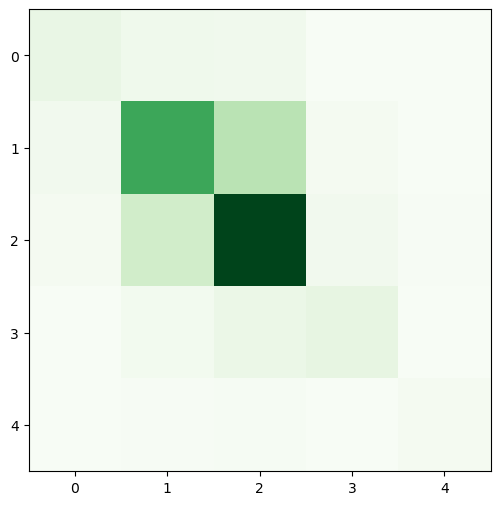

In [59]:
cm(y_pred_knn, y_test)

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [62]:
param_dist = {'n_estimators': randint(100, 2000),
              'max_features': ['auto', 'sqrt'],
              'max_depth': [3, 5, 10, 20, None],
              'min_samples_split': randint(2, 11),
              'min_samples_leaf': randint(1, 5),
              'criterion': ['gini', 'entropy']}

In [63]:
myRF = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='log2',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    n_jobs=-1,
    random_state=9,
    verbose=1,
    warm_start=False,
    class_weight='balanced')

In [64]:
#cv_strat = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)

In [67]:
clf_RF = RandomizedSearchCV(myRF, param_distributions=param_dist, n_iter=15,
                                   cv=mycv, verbose=1, n_jobs=-1, scoring='f1_macro')

In [68]:
# clf_RF.fit(X_train, y_train)
clf_RF.fit(X, y)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 532 out of 532 | elapsed:  1.5min finished


RandomizedSearchCV(cv=ShuffleSplit(n_splits=2, random_state=9, test_size=0.3, train_size=None),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    max_depth=5,
                                                    max_features='log2',
                                                    n_estimators=50, n_jobs=-1,
                                                    random_state=9, verbose=1),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189FAE3F340>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189FAEA2490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189EE11E940>},
                   scoring='f1_macro', verbose=1)

In [69]:
print(clf_RF.best_params_)

with open("RF.pkl", "wb") as f:
    pickle.dump(clf_RF, f)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 532}


# TEST

In [70]:
with open("RF.pkl", "rb") as f:
    clf_RF = pickle.load(f)

In [71]:
test_emb  = np.load('test_emb.npy')

In [72]:
y_pred_rf = clf_RF.predict(test_emb)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 532 out of 532 | elapsed:    0.7s finished


In [73]:
print(metrics.classification_report(y_pred_rf, y_test, zero_division=0))
print(metrics.confusion_matrix(y_pred_rf, y_test))

              precision    recall  f1-score   support

        -2.0       0.53      0.60      0.57       415
        -1.0       0.70      0.67      0.68      2889
         0.0       0.76      0.78      0.77      4095
         1.0       0.60      0.60      0.60       519
         2.0       0.59      0.57      0.58       109

    accuracy                           0.71      8027
   macro avg       0.64      0.64      0.64      8027
weighted avg       0.71      0.71      0.71      8027

[[ 251   91   68    5    0]
 [ 143 1924  760   58    4]
 [  76  671 3182  138   28]
 [   2   50  143  313   11]
 [   1   10   27    9   62]]


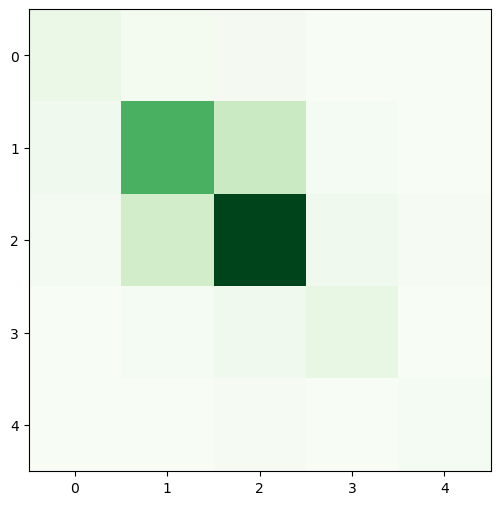

In [74]:
cm(y_pred_rf, y_test)

# SVM 

In [204]:
from sklearn import svm

In [205]:
# param_grid_svm = [
#   {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001, 'auto'], 'kernel': ['rbf']},
#   {'C': [1, 10, 100, 1000], 'degree': [3, 5, 7], 'gamma': [0.001, 0.0001, 'auto'], 'kernel': ['poly']}
#  ]
param_grid_svm = [
  {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [1, 10, 100], 'kernel': ['rbf']},
  {'C': [1, 10, 100], 'degree': [3, 5, 7], 'kernel': ['poly']}
 ]

In [206]:
clf_svm = GridSearchCV(svm.SVC(verbose=True), param_grid_svm, cv=cv_strat)

In [207]:
clf_svm.fit(X, y)

[LibSVM][LibSVM][LibSVM]

KeyboardInterrupt: 

In [ ]:
print(clf_svm.best_params_)

with open("clf_svm.pkl", "wb") as f:
    pickle.dump(clf_svm, f)

# TEST


In [ ]:
with open("clf_svm.pkl", "rb") as f:
    clf_svm = pickle.load(f)
    
test_emb  = np.load('test_emb.npy')

In [ ]:
y_pred_svm = clf_svm.predict(test_emb)

In [ ]:
print(metrics.classification_report(y_pred_svm, y_test, zero_division=0))
print(metrics.confusion_matrix(y_pred_svm, y_test))

In [ ]:
cm(y_pred_svm, y_test)

# Naive Bayes

### GaussianNB

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
nb_gaus = GaussianNB()
nb_gaus.fit(X, y)

GaussianNB()

In [99]:
with open("nb_gaus.pkl", "wb") as f:
    pickle.dump(nb_gaus, f)

### Test 

In [106]:
with open("nb_gaus.pkl", "rb") as f:
    nb_gaus = pickle.load(f)
    
test_emb  = np.load('test_emb.npy')

In [108]:
y_pred_nb_gaus = nb_gaus.predict(test_emb)

In [109]:
print(metrics.classification_report(y_pred_nb_gaus, y_test, zero_division=0))
print(metrics.confusion_matrix(y_pred_nb_gaus, y_test))

              precision    recall  f1-score   support

        -2.0       0.42      0.11      0.18      1768
        -1.0       0.24      0.44      0.31      1459
         0.0       0.40      0.70      0.51      2410
         1.0       0.37      0.14      0.20      1384
         2.0       0.49      0.05      0.09      1006

    accuracy                           0.35      8027
   macro avg       0.38      0.29      0.26      8027
weighted avg       0.38      0.35      0.29      8027

[[ 198  851  658   51   10]
 [ 100  646  662   42    9]
 [  66  563 1683   83   15]
 [  56  426  687  195   20]
 [  53  260  490  152   51]]


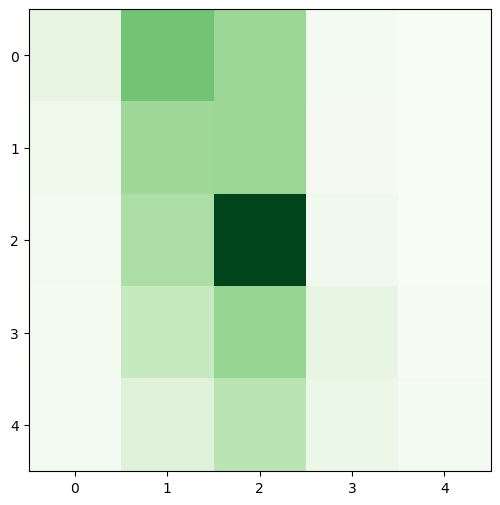

In [110]:
cm(y_pred_nb_gaus, y_test)

### MultinomialNB

In [112]:
from sklearn.naive_bayes import MultinomialNB

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [135]:
nb_mult = MultinomialNB()
nb_mult.fit(X_scaled, y)

MultinomialNB()

In [137]:
with open("nb_mult.pkl", "wb") as f:
    pickle.dump(nb_mult, f)

### Test

In [139]:
with open("nb_mult.pkl", "rb") as f:
    nb_mult = pickle.load(f)
    
test_emb  = np.load('test_emb.npy')

In [141]:
scaler.fit(test_emb)
X_test_scaled = scaler.transform(test_emb)

In [142]:
y_pred_nb_mult = nb_mult.predict(X_test_scaled)

In [143]:
print(metrics.classification_report(y_pred_nb_mult, y_test, zero_division=0))
print(metrics.confusion_matrix(y_pred_nb_mult, y_test))

              precision    recall  f1-score   support

        -2.0       0.45      0.11      0.17      1997
        -1.0       0.14      0.45      0.22       870
         0.0       0.39      0.69      0.50      2370
         1.0       0.36      0.12      0.18      1600
         2.0       0.51      0.05      0.08      1190

    accuracy                           0.31      8027
   macro avg       0.37      0.28      0.23      8027
weighted avg       0.39      0.31      0.26      8027

[[ 215  960  749   62   11]
 [  60  389  392   25    4]
 [  72  575 1629   77   17]
 [  59  501  833  188   19]
 [  67  321  577  171   54]]


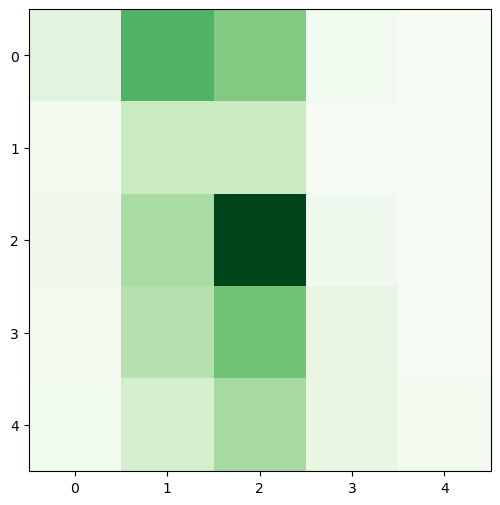

In [144]:
cm(y_pred_nb_mult, y_test)

# XGBoost

In [151]:
import xgboost as xgb

In [152]:
test_emb  = np.load('test_emb.npy')
#03-0.8, <0.1 2< <8, , 'early_stopping_rounds': [10]

In [161]:
param_grid_xgb = [ {'colsample_bytree': [0.3, 0.6, 0.8], 'learning_rate': [0.1],
                   'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 150, 200],
                   'alpha': [10]}]

In [162]:
xgb_cl = GridSearchCV(xgb.XGBClassifier(), param_grid_xgb, cv=mycv , scoring='f1_macro', 
                      n_jobs=-1, verbose=1)

In [165]:
xgb_cl.fit(X, y.astype("int") + 2)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=9, test_size=0.3, train_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     i...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid=[{'alpha': [10], 'colsample_bytree': [0.3, 0.6, 0.8],
                          'learning_rate': [0.1], 'max_depth': [2, 4, 6],
                          'n_estimators': [50, 100, 150, 200]}],
             scoring='f1_macro', verbose=1)

In [166]:
print(xgb_cl.best_params_)

{'alpha': 10, 'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


In [167]:
with open("xgb_cl.pkl", "wb") as f:
    pickle.dump(xgb_cl, f)

# TEST

In [170]:
with open("xgb_cl.pkl", "rb") as f:
    xgb_cl = pickle.load(f)
    
test_emb  = np.load('test_emb.npy')

In [171]:
y_pred_xgb = xgb_cl.predict(test_emb)

In [174]:
print(metrics.classification_report(y_pred_xgb-2, y_test, zero_division=0))
print(metrics.confusion_matrix(y_pred_xgb, y_test))

              precision    recall  f1-score   support

          -2       0.53      0.44      0.48       581
          -1       0.64      0.56      0.60      3125
           0       0.62      0.76      0.68      3414
           1       0.61      0.41      0.49       778
           2       0.58      0.47      0.52       129

    accuracy                           0.62      8027
   macro avg       0.60      0.53      0.56      8027
weighted avg       0.62      0.62      0.61      8027

[[   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [ 253  191  130    6    1    0    0]
 [ 144 1762 1125   84   10    0    0]
 [  61  646 2588   99   20    0    0]
 [  13  134  298  320   13    0    0]
 [   2   13   39   14   61    0    0]]


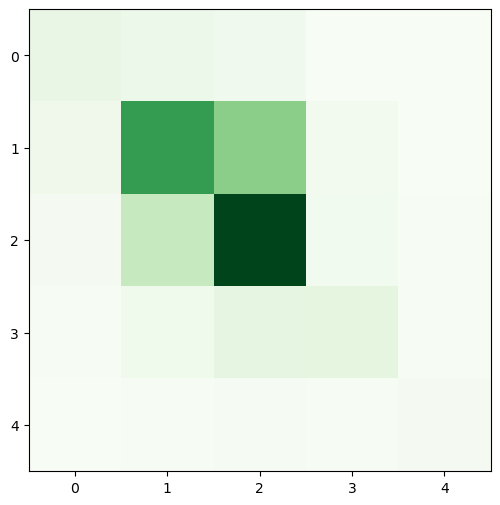

In [175]:
cm(y_pred_xgb-2, y_test)

# GradientBoostingClassifier

In [177]:
from sklearn.ensemble import GradientBoostingClassifier

In [178]:
test_emb  = np.load('test_emb.npy')

In [182]:
parameters_GradBoost = {
    "loss":["log_loss"],
    "learning_rate": [0.01, 0.1, 0.2],
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    # "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10, 50, 100]
    }

In [183]:
gradBoost_cl = GridSearchCV(GradientBoostingClassifier(), parameters_GradBoost, cv=mycv , 
                      scoring='f1_macro', n_jobs=-1, verbose=1)

In [184]:
gradBoost_cl.fit(X, y)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=9, test_size=0.3, train_size=None),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'loss': ['log_loss'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [10, 50, 100]},
             scoring='f1_macro', verbose=1)

In [192]:
print(gradBoost_cl.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


In [186]:
with open("gradBoost_cl.pkl", "wb") as f:
    pickle.dump(gradBoost_cl, f)

# TEST

In [187]:
with open("gradBoost_cl.pkl", "rb") as f:
    gradBoost_cl = pickle.load(f)
    
test_emb  = np.load('test_emb.npy')

In [188]:
y_pred_gradBoost = gradBoost_cl.predict(test_emb)

In [189]:
print(metrics.classification_report(y_pred_gradBoost, y_test, zero_division=0))
print(metrics.confusion_matrix(y_pred_gradBoost, y_test))

              precision    recall  f1-score   support

        -2.0       0.38      0.56      0.45       317
        -1.0       0.67      0.59      0.63      3104
         0.0       0.71      0.73      0.72      4095
         1.0       0.49      0.58      0.53       443
         2.0       0.39      0.60      0.47        68

    accuracy                           0.66      8027
   macro avg       0.53      0.61      0.56      8027
weighted avg       0.67      0.66      0.66      8027

[[ 179   76   58    4    0]
 [ 181 1831  991   86   15]
 [ 108  795 2984  170   38]
 [   5   42  128  257   11]
 [   0    2   19    6   41]]


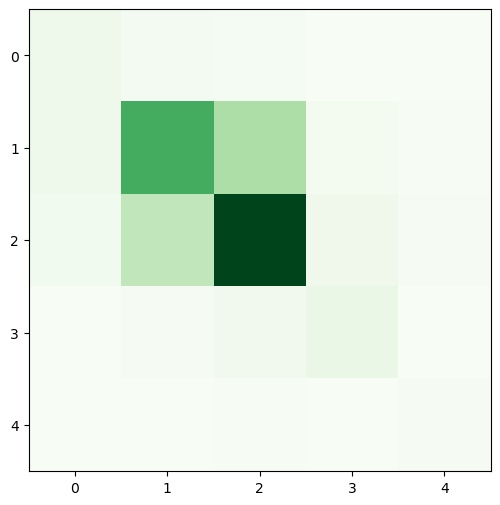

In [190]:
cm(y_pred_gradBoost, y_test)

# AdaBoostClassifier

In [193]:
from sklearn.ensemble import AdaBoostClassifier

In [194]:
test_emb  = np.load('test_emb.npy')

In [195]:
parameters_AdaBoost = {
    "learning_rate": [0.01, 0.5, 1.0],
    "n_estimators":[50, 100, 150, 200]
    }

In [196]:
adaBoost_cl = GridSearchCV(AdaBoostClassifier(), parameters_AdaBoost, cv=mycv, 
                      scoring='f1_macro', n_jobs=-1, verbose=1)

In [197]:
adaBoost_cl.fit(X, y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=9, test_size=0.3, train_size=None),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.5, 1.0],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1_macro', verbose=1)

In [198]:
print(adaBoost_cl.best_params_)

{'learning_rate': 0.5, 'n_estimators': 200}


In [199]:
with open("adaBoost_cl.pkl", "wb") as f:
    pickle.dump(adaBoost_cl, f)

# TEST

In [200]:
with open("adaBoost_cl.pkl", "rb") as f:
    adaBoost_cl = pickle.load(f)
    
test_emb  = np.load('test_emb.npy')

In [201]:
y_pred_adaBoost = adaBoost_cl.predict(test_emb)

In [202]:
print(metrics.classification_report(y_pred_adaBoost, y_test, zero_division=0))
print(metrics.confusion_matrix(y_pred_adaBoost, y_test))

              precision    recall  f1-score   support

        -2.0       0.45      0.12      0.19      1843
        -1.0       0.24      0.42      0.30      1545
         0.0       0.39      0.67      0.49      2443
         1.0       0.45      0.15      0.22      1609
         2.0       0.37      0.07      0.11       587

    accuracy                           0.35      8027
   macro avg       0.38      0.28      0.26      8027
weighted avg       0.39      0.35      0.30      8027

[[ 215  843  724   54    7]
 [  97  653  722   60   13]
 [  74  629 1637   86   17]
 [  66  479  800  235   29]
 [  21  142  297   88   39]]


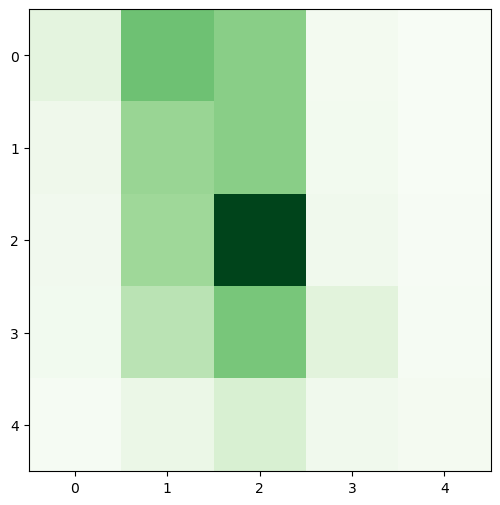

In [203]:
cm(y_pred_adaBoost, y_test)